<a href="https://colab.research.google.com/github/KucokDobra/PythonBasics/blob/main/Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting With ARIMA Model for DEMKIT simulation

code reference: https://medium.com/swlh/temperature-forecasting-with-arima-model-in-python-427b2d3bcb53


Time was changed from seconds format to 'Date', where every 60 seconds is a week  

In [ ]:
!pip install pmdarima


In [ ]:
import pandas as pd
import numpy as np

%load_ext google.colab.data_table

# HALF YEAR DATASET

In [166]:
List_of_colums_with_Data = ['Battery','DishWasher','DomesticHotWaterControllerBoiler','ElectricVehicle','HeatPump','Load','PV','SmartMeter','WashingMachine']


HALF_YEAR_raw_df=pd.read_excel('/content/HALF_YEAR_dataset.xlsx',index_col='time',parse_dates=True)
# "parse_date=True" to makes sure that pandas understands that it is dealing with date values and not string values
pure_DEMKIT_data=HALF_YEAR_raw_df[List_of_colums_with_Data]

#df=df.dropna()
print('Shape of data',pure_DEMKIT_data.shape)
pure_DEMKIT_data.head()

pure_DEMKIT_data['Load'].dtype

#raw_df=pd.read_excel('/content/ONE_week_inlfux_dem_210128165816_432000.xlsx',index_col='time',parse_dates=True

Shape of data (259199, 9)


dtype('int64')

# ONE-WEEK DATASET

In [106]:
#ONE WEEK
List_of_colums_with_Data = ['Battery','DishWasher','DomesticHotWaterControllerBoiler','ElectricVehicle','HeatPump','Load','PV','SmartMeter','WashingMachine']

one_week_raw_df=pd.read_excel('/content/drive/MyDrive/Google Colab/ONE_week_dataSet_DEMKIT.xlsx',index_col='time',parse_dates=True)
# "parse_date=True" to makes sure that pandas understands that it is dealing with date values and not string values
pure_DEMKIT_data = one_week_raw_df[List_of_colums_with_Data]

#df=df.dropna()
print('Shape of data',pure_DEMKIT_data.shape)
pure_DEMKIT_data.head()
pure_DEMKIT_data['Load'].dtype

# from pmdarima import auto_arima

# stepwise_fit = auto_arima(pure_DEMKIT_data['Load'], trace=True,suppress_warnings=True)
# stepwise_fit.summary()


Shape of data (10079, 9)


dtype('int64')

In [167]:
# DATA PREPROCESSING FOR ONE-WEEK FUTURE CALCULATIONS
df = HALF_YEAR_raw_df
df


Battery  DishWasher  ...  SmartMeter  WashingMachine
time                                         ...                            
1900-01-01 00:00:00 -249.514759         0.0  ...  463.393900             0.0
1900-01-08 00:00:00 -249.514759         0.0  ...  463.393900             0.0
1900-01-15 00:00:00 -249.514759         0.0  ...  463.393900             0.0
1900-01-22 00:00:00 -249.514759         0.0  ...  463.393900             0.0
1900-01-29 00:00:00 -249.514759         0.0  ...  463.393900             0.0
...                         ...         ...  ...         ...             ...
6867-07-17 00:00:00 -658.587830         0.0  ...  261.673577             0.0
6867-07-24 00:00:00 -658.587830         0.0  ...  261.673577             0.0
6867-07-31 00:00:00 -658.587830         0.0  ...  261.673577             0.0
6867-08-07 00:00:00 -658.587830         0.0  ...  261.673577             0.0
6867-08-14 00:00:00 -658.587830         0.0  ...  261.673577             0.0

[259199 rows x 9 columns]

In [109]:
# DATA PREPROCESSING FOR ONE-WEEK FUTURE CALCULATIONS
df = pure_DEMKIT_data
df

Battery  DishWasher  ...  SmartMeter  WashingMachine
time                                ...                            
1900-01-01 -249.514759         0.0  ...  463.393900             0.0
1900-01-08 -249.514759         0.0  ...  463.393900             0.0
1900-01-15 -249.514759         0.0  ...  463.393900             0.0
1900-01-22 -249.514759         0.0  ...  463.393900             0.0
1900-01-29 -249.514759         0.0  ...  463.393900             0.0
...                ...         ...  ...         ...             ...
2093-01-25   98.556332         0.0  ...  976.691433             0.0
2093-02-01   98.556332         0.0  ...  976.691433             0.0
2093-02-08   98.556332         0.0  ...  976.691433             0.0
2093-02-15   98.556332         0.0  ...  976.691433             0.0
2093-02-22   98.556332         0.0  ...  976.691433             0.0

[10079 rows x 9 columns]

# PLOTTING DATA
Any time series data that has to be modeled needs to be stationary. Stationary means that it’s statistical properties are more or less constant with time. Makes sense, right? How else are you supposed to make predictions if the statistical properties are varying with time? These are the following properties that any stationarity model will have:

1. Constant Mean
2. Constant Variance(There can be variations, but the variations shouldn’t be irregular)
3. No seasonality(No repeating patterns in the data set)

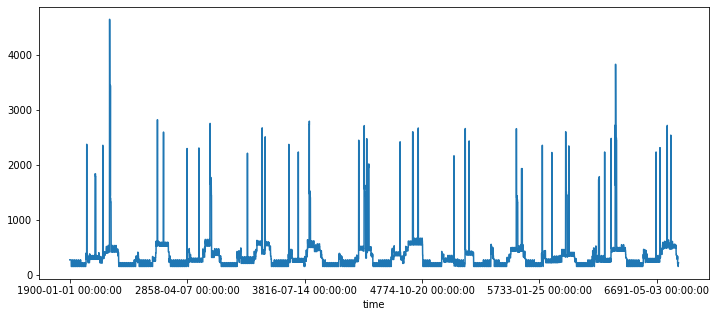

In [62]:
df['Load'].plot(figsize=(12,5))

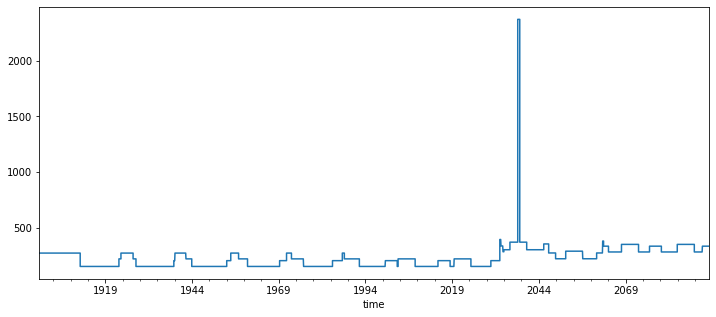

In [144]:
df['Load'].plot(figsize=(12,5))

**CHECKING FOR STATIONARITY** using ADF(Augmented Dickey Fuller Test)

In [168]:
#ADF function (Augmented Dickey Fuller Test)
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
     adftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",adftest[0])
     print("2. P-Value : ", adftest[1])
     print("3. Num Of Lags : ", adftest[2])
     print("4. Num Of Observations Used For ADF Regression:", adftest[3])
     print("5. Critical Values :")
     for key, val in adftest[4].items(): print("\t",key, ": ", val)
        
adf_test(df['Load'])



1. ADF :  -20.55889439321429
2. P-Value :  0.0
3. Num Of Lags :  75
4. Num Of Observations Used For ADF Regression: 259123
5. Critical Values :
	 1% :  -3.430375236527754
	 5% :  -2.8615511542253693
	 10% :  -2.5667759369906973


EVALUATION OF THE RESULTS ABOVE:

If p< 0.05 ; Data is stationary
if p>0.05; Data is not stationary

Since the p-value is small **"2. P-Value :  2.622576012656046e-11"** => data is more or less constant with time

In [105]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df['Load'], trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=96197.072, Time=2.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=96189.072, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=96191.072, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=96191.072, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=96187.072, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=96193.072, Time=1.78 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 6.600 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10079
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -48092.536
Date:                Wed, 07 Apr 2021   AIC                          96187.072
Time:                        01:13:36   BIC                          96194.290
Sample:                             0   HQIC                         96189.515
                              - 10079                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       817.3662      0.236   3460.178      0.000     816.903     817.829
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):        9470880118.67
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):             139.14   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                      4752.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# ARIMA MODEL IMPLEMENTATION

In [130]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#df.index = pd.DatetimeIndex(df.index).to_period('M')

print(df.shape)
train=df.iloc[:-5000]
test=df.iloc[-5000:]
print(train.shape,test.shape)
print(train)  #taking first 5000 rows


In [163]:
model=ARIMA(train['Load'],order=(1,1,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Load   No. Observations:                 5079
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -14438.413
Date:                Wed, 07 Apr 2021   AIC                          28880.826
Time:                        01:45:40   BIC                          28893.891
Sample:                    01-31-1900   HQIC                         28885.402
                         - 04-30-1997                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       1.668e-06    465.488   3.58e-09      1.000    -912.339     912.339
sigma2        17.2666      0.038    454.195      0.000      17.192      17.341
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          22148713.67
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -4.73
Prob(H) (two-sided):                  0.86   Kurtosis:                       326.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

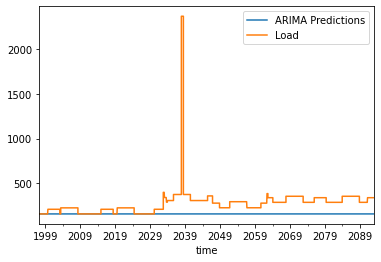

In [164]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.index = df.index[start:end+1]
pred.plot(legend=True)
test['Load'].plot(legend=True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(train['Load'].astype(np.int64),order=(1,1,0))
model=model.fit()
model.summary()

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
print(pred)
#test['Load'].plot(legend=True)